#Analysis of Controversial Comments in Reddit

###By Brendan Cruz Colon

###Geographical distribution of controversial comments on Reddit across US States

In [23]:
import pandas as pd
from collections import Counter
from __future__ import division

To do this, I'll need the abbreviation of each state, it's name, and its corresponding subreddit. I'll list these below.

In [24]:
state_subreddits = ['texas', 'california', 'newjersey', 'michigan', 'minnesota', 'colorado', 'wisconsin', 'florida',
                    'connecticut', 'oregon', 'ohio', 'hawaii', 'northcarolina', 'oklahoma', 'maryland', 'arizona',
                    'virginia', 'maine', 'indiana', 'iowa', 'washington', 'newhampshire', 'alaska', 'louisiana',
                    'massachusetts', 'vermont', 'newyork', 'arkansas', 'pennsylvania', 'alabama', 'kentucky',
                    'southcarolina', 'georgia', 'montana', 'delaware', 'utah', 'rhodeisland','missouri', 'tennessee',
                    'nebraska', 'illinois', 'westvirginia', 'newmexico', 'mississippi', 'kansas', 'northdakota',
                    'idaho', 'southdakota', 'wyoming', 'nevada']

state_abbreviations = ['TX', 'CA', 'NJ', 'MI', 'MN', 'CO', 'WI', 'FL', 'CT', 'OR', 'OH', 'HI', 'NC', 'OK', 'MD',
                       'AZ', 'VA', 'ME', 'IN', 'IA', 'WA', 'NH', 'AK', 'LA', 'MA', 'VT', 'NY', 'AR', 'PA', 'AL', 
                       'KY', 'SC', 'GA', 'MT', 'DE', 'UT', 'RI', 'MO', 'TN', 'NE', 'IL', 'WV', 'NM', 'MS', 'KS', 
                       'ND', 'ID', 'SD', 'WY', 'NV']

state_name = ['Texas', 'California', 'New Jersey', 'Michigan', 'Minnesota', 'Colorado', 'Wisconsin', 'Florida',
              'Connecticut', 'Oregon', 'Ohio', 'Hawaii', 'North Carolina', 'Oklahoma', 'Maryland', 'Arizona',
              'Virginia', 'Maine', 'Indiana', 'Iowa', 'Washington', 'New Hampshire', 'Alaska', 'Louisiana',
              'Massachusetts', 'Vermont', 'New York', 'Arkansas', 'Pennsylvania', 'Alabama', 'Kentucky',
              'South Carolina', 'Georgia', 'Montana', 'Delaware', 'Utah', 'Rhode Island', 'Missouri',
              'Tennessee', 'Nebraska', 'Illinois', 'West Virginia', 'New Mexico', 'Mississippi', 'Kansas',
              'North Dakota', 'Idaho', 'South Dakota', 'Wyoming', 'Nevada']

states_abbrev = {'AK': 'Alaska', 'AL': 'Alabama', 'AR': 'Arkansas', 'AS': 'American Samoa', 'AZ': 'Arizona',
                 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DC': 'District of Columbia',
                 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'GU': 'Guam', 'HI': 'Hawaii', 'IA': 'Iowa',
                 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana',
                 'MA': 'Massachusetts', 'MD': 'Maryland', 'ME': 'Maine', 'MI': 'Michigan', 'MN': 'Minnesota',
                 'MO': 'Missouri', 'MP': 'Northern Mariana Islands', 'MS': 'Mississippi', 'MT': 'Montana',
                 'NA': 'National', 'NC': 'North Carolina', 'ND': 'North Dakota', 'NE': 'Nebraska',
                 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NV': 'Nevada', 'NY': 'New York',
                 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'PR': 'Puerto Rico',
                 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas',
                 'UT': 'Utah', 'VA': 'Virginia', 'VI': 'Virgin Islands', 'VT': 'Vermont', 'WA': 'Washington',
                 'WI': 'Wisconsin', 'WV': 'West Virginia', 'WY': 'Wyoming'}

I then retrieved every comment from every one of these subreddits available on the Google Bigquery at the below link.

https://bigquery.cloud.google.com/dataset/fh-bigquery:reddit_comments

I purposely also scraped the retrieved_on column because the controversiality score wasn't added at Reddit's inception. If I look at the total dataset I'll bias the percentage of controversial comments. To remove most of this bias, I'll find the first indication of a controversial comment and then use all the data that occurs after that date. 

In [25]:
reddit_comments = pd.read_csv('all_comments.csv') #load all comments in all state-based subreddits
print reddit_comments.columns

Index([u'subreddit', u'controversiality', u'retrieved_on'], dtype='object')


In [26]:
all_controversial = reddit_comments[reddit_comments['controversiality'] == 1]
soonest_controversial_comment = int(all_controversial['retrieved_on'].min()) #finds the first controversial comment
test_df = reddit_comments[reddit_comments['retrieved_on'] < soonest_controversial_comment]
test_df['controversiality'].sum() #and this should equal zero

0

In [27]:
reddit_comments = reddit_comments[reddit_comments['retrieved_on'] > soonest_controversial_comment]
state_lowercase = []
for state in reddit_comments['subreddit'].tolist(): #rearrangement to keep state names consistent
    state_lowercase.append( state.lower() ) 
reddit_comments['subreddit'] = state_lowercase

In [28]:
###collect data on controversial comments
controversial_tally = Counter(reddit_comments['subreddit'][reddit_comments['controversiality'] == 1])
benign_tally = Counter(reddit_comments['subreddit'][reddit_comments['controversiality'] == 0])
total_comments = controversial_tally + benign_tally

state_controversy = []
comment_count = []

for state in state_subreddits:
    comment_count.append( total_comments.get(state) )
    if controversial_tally.get(state) != None:
        state_controversy.append(controversial_tally.get(state)/(controversial_tally.get(state)
                                                                 + benign_tally.get(state)))
    else:
        state_controversy.append(0)
        
state_comment_df = pd.DataFrame({'subreddit': state_subreddits, 
                                 'Average Controversial Comment': [x * 100 for x in state_controversy],
                                 'State Abbreviation': state_abbreviations, 
                                 'Total Comments': total_comments}, index=state_name)

In [29]:
#adapted from Harvard CS109
%matplotlib inline
from collections import defaultdict
import json

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [30]:
#adapted from  https://github.com/dataiap/dataiap/blob/master/resources/util/map_util.py

#load in state geometry
state2poly = defaultdict(list)

data = json.load(file("us-states_edited.json"))
for f in data['features']:
    state = states_abbrev[f['id']]
    geo = f['geometry']
    if geo['type'] == 'Polygon':
        for coords in geo['coordinates']:
            state2poly[state].append(coords)
    elif geo['type'] == 'MultiPolygon':
        for polygon in geo['coordinates']:
            state2poly[state].extend(polygon)

            
def draw_state(plot, stateid, **kwargs):
    """
    draw_state(plot, stateid, color=..., **kwargs)
    
    Automatically draws a filled shape representing the state in
    subplot.
    The color keyword argument specifies the fill color.  It accepts keyword
    arguments that plot() accepts
    """
    for polygon in state2poly[stateid]:
        xs, ys = zip(*polygon)
        plot.fill(xs, ys, **kwargs)

        
def make_map(states, label):
    """
    Draw a cloropleth map, that maps data onto the United States
    
    Inputs
    -------
    states : Column of a DataFrame
        The value for each state, to display on a map
    label : str
        Label of the color bar

    Returns
    --------
    The map
    """
    fig = plt.figure(figsize=(14, 10), dpi=300)
    ax = plt.gca()

    if states.max() > 0: # colormap for election probabilities 
        cmap = cm.seismic
        vmin, vmax = 0, states.max()
    else:  # colormap for electoral votes
        cmap = cm.binary
        vmin, vmax = 0, states.max()
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    
    skip = set(['National', 'District of Columbia', 'Guam', 'Puerto Rico',
                'Virgin Islands', 'American Samoa', 'Northern Mariana Islands'])
    for state in states_abbrev.values():
        if state in skip:
            continue
        color = cmap(norm(states.ix[state]))
        draw_state(ax, state, color = color, ec='k')

    #add an inset colorbar
    ax1 = fig.add_axes([0.45, 0.70, 0.4, 0.02])    
    cb1=mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                  norm=norm,
                                  orientation='horizontal')
    ax1.set_title(label, size='x-large')
    remove_border(ax, left=False, bottom=False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-180, -60)
    ax.set_ylim(15, 75)
    return ax

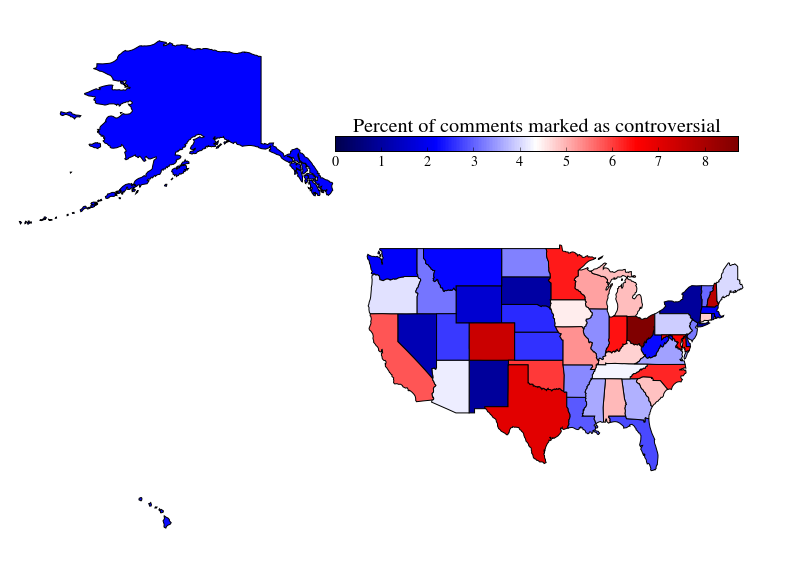

In [31]:
make_map(state_comment_df['Average Controversial Comment'], "Percent of comments marked as controversial");